# Practice Exercise: Cleaning data & Transforming columns/features

## Context:
- The data is based on real anonymized Czech bank transactions and account info.
- We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course. 
- But here is the original task description of the dataset publishers:

*The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services)   and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.*

## Dataset Description:

We'll work on three datasets (in three separate csv files):

  - **account**: each record describes static characteristics of an account
  - **transaction**: each record describes one transaction on an account
  - **district**: each record describes demographic characteristics of a district
  
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

## Objective: 
   - Examine/clean the individual dataset
   - Combine them into a single dataset, which is subject to more cleaning
   - Create new columns based on existing columns

By the end, the new dataset is ready for more analysis.

### 1. Import the libraries

In [54]:
import pandas as pd

### 2. Import the data from three csv files as DataFrames `account`, `district`, `trans`
Hint: 
- the `read_csv` function can automatically infer and load zip file, read its documentation of parameter `compression` if you are interested in details
- you may ignore the warning when reading the `trans.csv.zip` file. It is optional to follow the warning instructions to remove it.

### 3. Look at the info summary, head of each DataFrame

In [55]:
account = pd.read_csv(r"C:\Users\yigez\Desktop\account.csv")
district = pd.read_csv(r"C:\Users\yigez\Desktop\district.csv")
trans = pd.read_csv(r"C:\Users\yigez\Desktop\trans.csv" , dtype= {'partner_bank': 'string'})

### 4. Check for the unique values and their counts in each column for the three DataFrames

In [56]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


In [57]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district_id           76 non-null     int64  
 1   district_name         76 non-null     object 
 2   region                76 non-null     object 
 3   population            76 non-null     int64  
 4   average_salary        66 non-null     float64
 5   unemployment_rate     66 non-null     float64
 6   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.3+ KB


In [58]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   873206 non-null   object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      574439 non-null   object 
 8   partner_bank     273508 non-null   string 
 9   partner_account  295389 non-null   float64
dtypes: float64(3), int64(2), object(4), string(1)
memory usage: 80.6+ MB


### 5. Check for duplicates in the three DataFrames

In [59]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [60]:
district[district.duplicated()]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes


In [61]:
trans[trans.describe()]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1056316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1056317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1056318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


In [62]:
print("Hello")

Hello


In [63]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

In [64]:
district.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [65]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

In [66]:
trans[trans.duplicated()]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account


In [67]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [68]:
district[district.duplicated()]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes


In [69]:
account['client_id']>4500

0       False
1        True
2       False
3       False
4       False
        ...  
4495    False
4496     True
4497    False
4498    False
4499    False
Name: client_id, Length: 4500, dtype: bool

In [70]:
account[account['client_id']>1000]

,account_id,district_id,frequency,account_open_date,client_id
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177
5,1972,77,MONTHLY STATEMENTS,1993-01-02,2397
6,1539,1,STATEMENTS AFTER TRANSACTION,1993-01-03,1866
...,...,...,...,...,...
4493,906,59,MONTHLY STATEMENTS,1997-12-27,1091
4494,845,14,MONTHLY STATEMENTS,1997-12-27,1019
4496,3958,59,MONTHLY STATEMENTS,1997-12-28,4774
4498,1573,63,MONTHLY STATEMENTS,1997-12-29,1906


### 6. Convert column `account_open_date` in `account` and column `date` in `trans` into datetime dtypes

In [71]:

account.head()

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [72]:
account['account_open_date_2'] = pd.to_datetime(account['account_open_date'])

In [73]:
account.head()

,account_id,district_id,frequency,account_open_date,client_id,account_open_date_2
0,576,55,MONTHLY STATEMENTS,1993-01-01,692,1993-01-01
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601,1993-01-01
2,704,55,MONTHLY STATEMENTS,1993-01-01,844,1993-01-01
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873,1993-01-01
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177,1993-01-02


In [74]:
trans['date'] = pd.to_datetime(trans['date'])

In [75]:
trans.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,<NA>,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,<NA>,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,<NA>,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,<NA>,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,<NA>,NaN


In [76]:
account.drop('account_open_date_2', axis=1,inplace=True)

In [77]:
account.head()

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [78]:
account.dtypes

account_id            int64
district_id           int64
frequency            object
account_open_date    object
client_id             int64
dtype: object

In [79]:
trans.dtypes

trans_id                    int64
account_id                  int64
date               datetime64[ns]
type                       object
operation_type             object
amount                    float64
balance                   float64
description                object
partner_bank               string
partner_account           float64
dtype: object

In [80]:
trans.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,<NA>,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,<NA>,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,<NA>,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,<NA>,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,<NA>,NaN


In [81]:
district['region']=district['region'].str.upper()


In [82]:
district.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,PRAGUE,1204953,12541.0,0.43,99107.0
1,2,Benesov,CENTRAL BOHEMIA,88884,NaN,NaN,2674.0
2,3,Beroun,CENTRAL BOHEMIA,75232,8980.0,2.21,2813.0
3,4,Kladno,CENTRAL BOHEMIA,149893,9753.0,5.05,NaN
4,5,Kolin,CENTRAL BOHEMIA,95616,9307.0,4.43,NaN


### 7. Convert the columns `region` and `district_name` in `district` to all uppercase

In [83]:
district['region'] = district['region'].str.upper()
district['distinct_name'] = district['district_name'].str.upper()

In [84]:
district.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes,distinct_name
0,1,Hl.m. Praha,PRAGUE,1204953,12541.0,0.43,99107.0,HL.M. PRAHA
1,2,Benesov,CENTRAL BOHEMIA,88884,NaN,NaN,2674.0,BENESOV
2,3,Beroun,CENTRAL BOHEMIA,75232,8980.0,2.21,2813.0,BEROUN
3,4,Kladno,CENTRAL BOHEMIA,149893,9753.0,5.05,NaN,KLADNO
4,5,Kolin,CENTRAL BOHEMIA,95616,9307.0,4.43,NaN,KOLIN


### 8. Check for missing data by columns in `account` using the `isna` method

In [85]:
account.isna().sum()

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64

In [86]:
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64

### 9. Check for missing data by columns in `district` using the `isna` method

`district` has numeric features that could have relationships with each other. Let's use iterative imputation on them.

In [87]:
district.isna().sum()

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
distinct_name            0
dtype: int64

#### Use `IterativeImputer` in `sklearn` to impute based on columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

##### Import libraries

In [102]:
from sklearn.experimental import enable_iterative_imputer

In [103]:
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`
These are the columns that might be related to each other 

In [104]:
columns_to_impute = ['population','average_salary','unemployment_rate','num_committed_crimes']

In [105]:
iter_imp = IterativeImputer(min_value=district[columns_to_impute].min(),max_value=district[columns_to_impute].max())

##### Create `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [92]:
district[columns_to_impute].min()

population              42821.00
average_salary           8110.00
unemployment_rate           0.43
num_committed_crimes      888.00
dtype: float64

In [93]:
district[columns_to_impute].max()

population              1204953.0
average_salary            12541.0
unemployment_rate             9.4
num_committed_crimes      99107.0
dtype: float64

In [99]:
iter_imp = IterativeImputer(min_value = district[columns_to_impute])

In [100]:
district[columns_to_impute]

,population,average_salary,unemployment_rate,num_committed_crimes
0,1204953,12541.0,0.43,99107.0
1,88884,NaN,NaN,2674.0
2,75232,8980.0,2.21,2813.0
3,149893,9753.0,5.05,NaN
4,95616,9307.0,4.43,NaN
...,...,...,...,...
71,226122,NaN,4.79,9208.0
72,182027,8746.0,3.74,4433.0
73,323870,10673.0,5.44,18347.0
74,138032,8819.0,5.66,4505.0


##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [106]:
impured_columns = iter_imp.fit_transform(district[columns_to_impute])

In [107]:
impured_columns

array([[1.20495300e+06, 1.25410000e+04, 4.30000000e-01, 9.91070000e+04],
       [8.88840000e+04, 8.81396950e+03, 3.76387269e+00, 2.67400000e+03],
       [7.52320000e+04, 8.98000000e+03, 2.21000000e+00, 2.81300000e+03],
       [1.49893000e+05, 9.75300000e+03, 5.05000000e+00, 6.31246351e+03],
       [9.56160000e+04, 9.30700000e+03, 4.43000000e+00, 1.92027286e+03],
       [7.79630000e+04, 8.54600000e+03, 4.02000000e+00, 3.12000000e+03],
       [9.47250000e+04, 8.83600672e+03, 2.87000000e+00, 4.84600000e+03],
       [1.12065000e+05, 8.90172995e+03, 1.44000000e+00, 4.98700000e+03],
       [8.13440000e+04, 8.89900000e+03, 3.97000000e+00, 2.48700000e+03],
       [9.20840000e+04, 1.01240000e+04, 5.40000000e-01, 1.63064296e+03],
       [7.56370000e+04, 9.62200000e+03, 3.94888743e+00, 3.52900000e+03],
       [1.07870000e+05, 8.75400000e+03, 4.31000000e+00, 3.86800000e+03],
       [5.39210000e+04, 8.68147504e+03, 3.26000000e+00, 1.87500000e+03],
       [1.77686000e+05, 1.00450000e+04, 1.71000000e

##### Assign the imputed array back to the original DataFrame's columns

In [ ]:
district[columns_to_impute] =impured_columns

##### Double check that the columns are imputed

In [ ]:
district.isna().sum()

district_id             0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
distinct_name           0
dtype: int64

### 10. Check for missing data by columns in `trans` using the `isna` method

In [ ]:
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64

In [ ]:
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64

#### Divide the columns into numeric columns and categorical columns, then use the `fillna` method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [ ]:
num_cols = trans.select_dtypes(include='number')

In [ ]:
num_cols.columns

Index(['trans_id', 'account_id', 'amount', 'balance', 'partner_account'], dtype='object')

In [ ]:
cat_cols = trans.select_dtypes(exclude='number')

In [ ]:
cat_cols.columns

Index(['date', 'type', 'operation_type', 'description', 'partner_bank'], dtype='object')

In [ ]:
trans[num_cols.columns] = trans[num_cols.columns].fillna(-999)

In [ ]:
trans

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,<NA>,-999.0
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,<NA>,-999.0
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,<NA>,-999.0
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,<NA>,-999.0
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,<NA>,-999.0
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,1998-12-31,CREDIT,NaN,62.3,13729.4,INTEREST CREDIT,<NA>,-999.0
1056316,3627616,2935,1998-12-31,CREDIT,NaN,81.3,19544.9,INTEREST CREDIT,<NA>,-999.0
1056317,3625403,2869,1998-12-31,CREDIT,NaN,60.2,14638.2,INTEREST CREDIT,<NA>,-999.0
1056318,3626683,2907,1998-12-31,CREDIT,NaN,107.5,23453.0,INTEREST CREDIT,<NA>,-999.0


In [ ]:
trans[cat_cols.columns] = trans[cat_cols.columns].fillna('uknown')

In [ ]:
trans

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,uknown,uknown,-999.0
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,uknown,uknown,-999.0
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,uknown,uknown,-999.0
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,uknown,uknown,-999.0
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,uknown,uknown,-999.0
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,1998-12-31,CREDIT,uknown,62.3,13729.4,INTEREST CREDIT,uknown,-999.0
1056316,3627616,2935,1998-12-31,CREDIT,uknown,81.3,19544.9,INTEREST CREDIT,uknown,-999.0
1056317,3625403,2869,1998-12-31,CREDIT,uknown,60.2,14638.2,INTEREST CREDIT,uknown,-999.0
1056318,3626683,2907,1998-12-31,CREDIT,uknown,107.5,23453.0,INTEREST CREDIT,uknown,-999.0


### 11. Check for outliers in `district` using the `describe` method, then look at the histograms of the suspicious columns

In [ ]:
district.describe()

,district_id,population,average_salary,unemployment_rate,num_committed_crimes
count,76.000000,7.600000e+01,76.000000,76.000000,76.000000
mean,38.500000,1.336920e+05,8983.707247,3.864003,5054.492038
std,22.083176,1.378127e+05,740.959314,1.721597,11392.279917
min,1.000000,4.282100e+04,8110.000000,0.430000,888.000000
25%,19.750000,8.472500e+04,8533.750000,2.650000,1918.454646
50%,38.500000,1.083910e+05,8792.984750,3.761936,2864.000000
75%,57.250000,1.382770e+05,9280.750000,4.570000,4562.413240
max,76.000000,1.204953e+06,12541.000000,9.400000,99107.000000


array([[<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'average_salary'}>],
       [<AxesSubplot:title={'center':'unemployment_rate'}>,
        <AxesSubplot:title={'center':'num_committed_crimes'}>]],
      dtype=object)

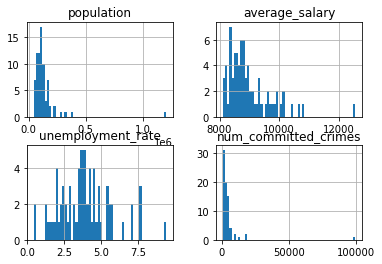

In [ ]:
district[['population','average_salary','unemployment_rate','num_committed_crimes']].hist(bins=60)

#### Explore the outliers in the dataset

### 12. Check for outliers in `trans` using the `describe` method, then look at the histograms of the suspicious columns

#### Explore the outliers in the dataset

The DataFrame `account` doesn't have any columns that could have outliers, so we are not exploring it.

### 13. Merge (left join) `account` and `district` into a new DataFrame called `account_district` using their common columns

In [ ]:
# select * from account a left join district d on a. district_id =d .district_id
account_district = pd.merge(account,district,on = 'district_id', how = 'left')     

In [ ]:
account_district.head()

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes,distinct_name
0,576,55,MONTHLY STATEMENTS,1993-01-01,692,Brno - venkov,SOUTH MORAVIA,157042.0,9072.274638,2.43,3894.0,BRNO - VENKOV
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601,Ostrava - mesto,NORTH MORAVIA,323870.0,10673.000000,5.44,18347.0,OSTRAVA - MESTO
2,704,55,MONTHLY STATEMENTS,1993-01-01,844,Brno - venkov,SOUTH MORAVIA,157042.0,9072.274638,2.43,3894.0,BRNO - VENKOV
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873,Jindrichuv Hradec,SOUTH BOHEMIA,93931.0,8427.000000,1.54,1913.0,JINDRICHUV HRADEC
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177,Karlovy Vary,WEST BOHEMIA,122603.0,8991.000000,2.01,5273.0,KARLOVY VARY


In [ ]:
account_district = pd.merge(account,district,on = 'district_id', how = 'left')[['account_id', 'population']]

In [ ]:
account_district.head()

,account_id,population
0,576,157042.0
1,3818,323870.0
2,704,157042.0
3,2378,93931.0
4,2632,122603.0


### 14. Check the information summary of `account_district`, any missing data?

#### Look at the rows with missing data in `account_district`

#### Use `SimpleImputer` from `sklearn` to impute the missing data in columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` with their means

In [ ]:
from sklearn.experimental import enable_iterative_imputer

In [ ]:
from sklearn.impute import SimpleImputer

#### Use `fillna` method to impute the missing data in columns `district_name` and `region` with 'UNKNOWN'

In [ ]:
columns_to_impute

### 15. Merge (left join) `trans` and `account_district` into a new DataFrame called `all_data` using their common columns

#### Check the information summary of `all_data`

### 16. Create a new column `account_open_year` and assign it as the year from column `account_open_date`

### 17. Calculate the difference between columns `date` (transaction date) and `account_open_date`

### 18. Create a new column `account_age_days` and assign it as the difference in days between columns `date` (transaction date) and `account_open_date`

### 19. Create a new column `amount_category` by cutting the column `amount` into 3 equal-sized bins, and label the bins as 'low_amount', 'medium_amount', 'high_amount'

#### Verify the categories and their counts in `amount_category`

### 20. Create a new column `account_age_days_category` by cutting the column `account_age_days` into 5 equal-width bins

#### Verify the categories and their counts in `account_age_days_category`

#### Print out the first 20 rows of `all_data` to look at the newly added columns